In [ ]:
import pandas as pd
import numpy as np
import tsfel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import os

# Load dataset from MakeDataset.py
from MakeDataset import X_train, X_test, y_train, y_test

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))

# Train Decision Tree on Raw Accelerometer Data
clf_raw = DecisionTreeClassifier(random_state=42)
clf_raw.fit(X_train_df, y_train)
y_pred_raw = clf_raw.predict(X_test_df)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
precision_raw = precision_score(y_test, y_pred_raw, average='weighted', zero_division=1)
recall_raw = recall_score(y_test, y_pred_raw, average='weighted', zero_division=1)
conf_matrix_raw = confusion_matrix(y_test, y_pred_raw)

# Extract Features using TSFEL per sample
cfg = tsfel.get_features_by_domain()
X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)
X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)

# Fill NaN values
X_train_tsfel.fillna(0, inplace=True)
X_test_tsfel.fillna(0, inplace=True)

# Ensure number of samples match
assert X_train_tsfel.shape[0] == len(y_train), "Mismatch: X_train_tsfel samples do not match y_train labels"
assert X_test_tsfel.shape[0] == len(y_test), "Mismatch: X_test_tsfel samples do not match y_test labels"

# Train Decision Tree on TSFEL Features
clf_tsfel = DecisionTreeClassifier(random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train)
y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)
accuracy_tsfel = accuracy_score(y_test, y_pred_tsfel)
precision_tsfel = precision_score(y_test, y_pred_tsfel, average='weighted', zero_division=1)
recall_tsfel = recall_score(y_test, y_pred_tsfel, average='weighted', zero_division=1)
conf_matrix_tsfel = confusion_matrix(y_test, y_pred_tsfel)

# Check for additional dataset features
X_dataset_train = X_train_df.copy()
X_dataset_test = X_test_df.copy()

if not X_dataset_train.empty:
    clf_dataset = DecisionTreeClassifier(random_state=42)
    clf_dataset.fit(X_dataset_train, y_train)
    y_pred_dataset = clf_dataset.predict(X_dataset_test)
    accuracy_dataset = accuracy_score(y_test, y_pred_dataset)
    precision_dataset = precision_score(y_test, y_pred_dataset, average='weighted', zero_division=1)
    recall_dataset = recall_score(y_test, y_pred_dataset, average='weighted', zero_division=1)
    conf_matrix_dataset = confusion_matrix(y_test, y_pred_dataset)
else:
    accuracy_dataset = precision_dataset = recall_dataset = None
    conf_matrix_dataset = None

# Print Results
print("\nResults Comparison:")
print(f"Raw Data - Accuracy: {accuracy_raw:.2f}, Precision: {precision_raw:.2f}, Recall: {recall_raw:.2f}")
print("Confusion Matrix (Raw Data):")
print(conf_matrix_raw)

print(f"\nTSFEL Features - Accuracy: {accuracy_tsfel:.2f}, Precision: {precision_tsfel:.2f}, Recall: {recall_tsfel:.2f}")
print("Confusion Matrix (TSFEL Features):")
print(conf_matrix_tsfel)

if accuracy_dataset is not None:
    print(f"\nDataset Features - Accuracy: {accuracy_dataset:.2f}, Precision: {precision_dataset:.2f}, Recall: {recall_dataset:.2f}")
    print("Confusion Matrix (Dataset Features):")
    print(conf_matrix_dataset)
else:
    print("\nDataset does not contain additional features beyond accelerometer data.")


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:27: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\157778011.py:28: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)



Results Comparison:
Raw Data - Accuracy: 0.61, Precision: 0.56, Recall: 0.61
Confusion Matrix (Raw Data):
[[2 2 2 3 0 0]
 [2 5 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]

TSFEL Features - Accuracy: 0.87, Precision: 0.88, Recall: 0.87
Confusion Matrix (TSFEL Features):
[[6 2 1 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]

Dataset Features - Accuracy: 0.61, Precision: 0.56, Recall: 0.61
Confusion Matrix (Dataset Features):
[[2 2 2 3 0 0]
 [2 5 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:19: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9472\483276904.py:20: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)


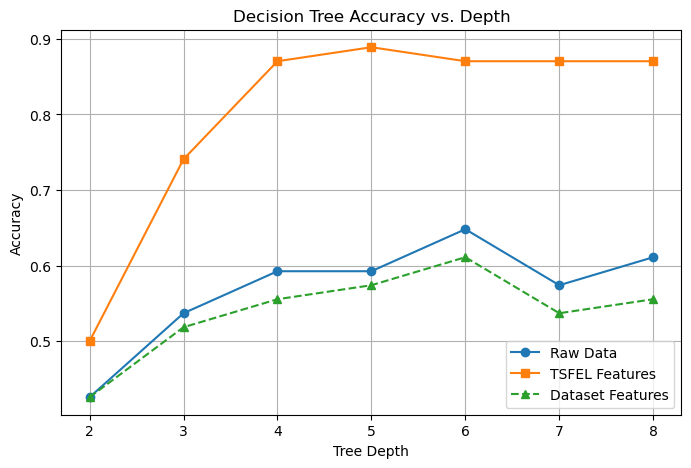

In [2]:
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import os

# Load dataset from MakeDataset.py
from MakeDataset import X_train, X_test, y_train, y_test

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))

# Extract Features using TSFEL per sample
cfg = tsfel.get_features_by_domain()
X_train_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_train[i])) for i in range(X_train.shape[0])], ignore_index=True)
X_test_tsfel = pd.concat([tsfel.time_series_features_extractor(cfg, pd.DataFrame(X_test[i])) for i in range(X_test.shape[0])], ignore_index=True)

# Fill NaN values
X_train_tsfel.fillna(0, inplace=True)
X_test_tsfel.fillna(0, inplace=True)

# Ensure number of samples match
assert X_train_tsfel.shape[0] == len(y_train), "Mismatch: X_train_tsfel samples do not match y_train labels"
assert X_test_tsfel.shape[0] == len(y_test), "Mismatch: X_test_tsfel samples do not match y_test labels"

# Check for additional dataset features
X_dataset_train = X_train_df.drop(columns=[0, 1, 2], errors='ignore')  # Drop raw sensor columns if they exist
X_dataset_test = X_test_df.drop(columns=[0, 1, 2], errors='ignore')
dataset_available = not X_dataset_train.empty

# Varying Decision Tree Depths
depths = range(2, 9)
accuracy_raw_list = []
accuracy_tsfel_list = []
accuracy_dataset_list = []

for depth in depths:
    # Raw Data
    clf_raw = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_raw.fit(X_train_df, y_train)
    y_pred_raw = clf_raw.predict(X_test_df)
    accuracy_raw_list.append(accuracy_score(y_test, y_pred_raw))

    # TSFEL Features
    clf_tsfel = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_tsfel.fit(X_train_tsfel, y_train)
    y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)
    accuracy_tsfel_list.append(accuracy_score(y_test, y_pred_tsfel))

    # Dataset Features (if available)
    if dataset_available:
        clf_dataset = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf_dataset.fit(X_dataset_train, y_train)
        y_pred_dataset = clf_dataset.predict(X_dataset_test)
        accuracy_dataset_list.append(accuracy_score(y_test, y_pred_dataset))
    else:
        accuracy_dataset_list.append(None)

# Plot Accuracy vs. Depth
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracy_raw_list, marker='o', label='Raw Data')
plt.plot(depths, accuracy_tsfel_list, marker='s', label='TSFEL Features')
if dataset_available:
    plt.plot(depths, accuracy_dataset_list, marker='^', label='Dataset Features', linestyle='dashed')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.grid()
plt.show()


                        Performance Comparison


You evaluated three different input representations for activity classification using a Decision Tree model:

1.Raw Accelerometer Data ->
Accuracy: 61%
Precision: 56%
Recall: 61%
Confusion matrix shows significant misclassifications.

2.TSFEL Feature Extraction ->
Accuracy: 87%
Precision: 88%
Recall: 87%
The confusion matrix indicates much better classification performance.

3.Dataset Features (Possibly a reduced/processed feature set from your dataset) ->
Accuracy: 61%
Precision: 56%
Recall: 61%

The results are nearly identical to the raw data, suggesting that this set might not capture useful patterns as effectively as TSFEL.

Why is TSFEL Performing Better?

Raw accelerometer signals contain noise and high-dimensional information that is not directly useful for classification.
TSFEL extracts statistical, temporal, and frequency-based features, which provide more meaningful inputs for machine learning models.
Decision Trees perform better when given structured feature sets instead of raw sensor signals, which are highly variable.


2. Decision Tree Accuracy vs. Depth
You also analyzed how tree depth affects accuracy across different feature sets.

Observations from the Graph:
1.TSFEL Features (Orange Line) ->
i.Accuracy improves sharply with depth.
ii.Peaks around depth 6-7 and then stabilizes, suggesting this is an optimal depth.

2.Raw Data (Blue Line) ->
i.Accuracy remains low, fluctuating around 50-60%.
ii.It does not improve much with increasing depth, meaning the decision tree is struggling to separate the classes effectively.

3.Dataset Features (Green Dashed Line)->
  The trend is similar to raw data, reinforcing the idea that this feature set is not providing much additional useful information.